# **Cardiovascular** **disease**

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
# from google.colab import drive 
# drive.mount('/content/gdrive')
# fr=pd.read_csv('gdrive/My Drive/framingham.csv')
fr = pd.read_csv('framingham.csv')
fr.head() #to preview the loaded data

Mounted at /content/gdrive


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
fr.shape # to see the number of data entries

(4238, 16)

In [ ]:
# Target Variable = TenYearCHD (binary)

#Features are 
#if a person is male or female(nominal type of data)
#If the person smokes or not currently(nominal type of data), if he does than how many cigarettes per day he/she consumes!(a continous data)
#There's information of person's past medical issues in the columns [BPMeds, prevalentStoke, prevalentHyp, diabetes] in form of nominal data.
#There's information about person's current medical condition in columns [totChol,sysBP,diaBP,BMI,heartRate,glucose] in form of continuous data.

#fr=fr.drop['education',1]
#because education is not a required data 
#fr.head()

In [ ]:
#Performing basic EDA on data to find interesting patterns and observations

#Starting with finding missing variables 
#total percentage of missing data
missing_data = fr.isnull().sum()
tot_per = (missing_data.sum()/fr.shape[0]) * 100
print(f'Missing data in percentage = {(tot_per)}%')


Missing data in percentage = 15.219443133553561%


            Total  Percentage
glucose       388    9.155262
education     105    2.477584
BPMeds         53    1.250590
totChol        50    1.179802
cigsPerDay     29    0.684285
BMI            19    0.448325
heartRate       1    0.023596


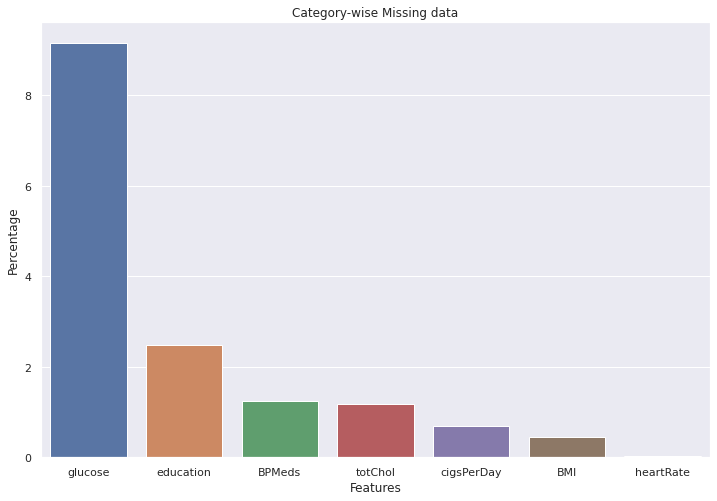

In [ ]:
# missing data category wise 
total = fr.isnull().sum().sort_values(ascending=False)
percent_total = (fr.isnull().sum()/fr.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
print(missing_data)

#plotting the missing data category wise
plt.figure(figsize=(12,8))
sns.set(style="darkgrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Category-wise Missing data')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.show()


In [ ]:
#Through Table and plot we can see category glucose has highest percentage of missing data

fr.dropna(axis=0, inplace=True)  #Drop the missing data for better analysis
fr.shape    # we can see that data has been droped off

(3656, 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


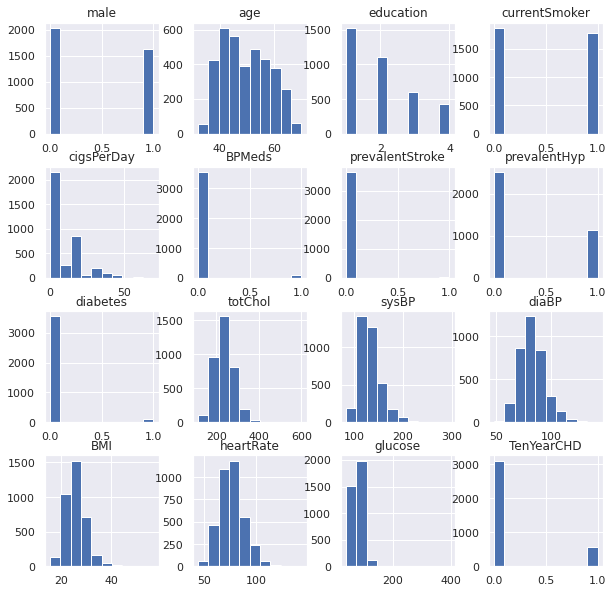

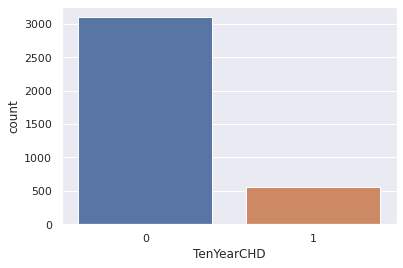

Patients without heart disease: 3099 ; patients with heart disease:557 


In [ ]:
# histogram for analysing data distribution 

figure = plt.figure(figsize = (10,10))
ax = figure.gca()
fr.hist(ax = ax)
plt.show()
#We observe some data sets[prevalentStroke, diabetes, and BPMeds] are poorly distributed
# Case counts
sns.countplot(data=fr,x='TenYearCHD')
plt.show()
cases = fr.TenYearCHD.value_counts()
print(f"Patients without heart disease: {cases[0]} ; patients with heart disease:{cases[1]} ")
# Number of people without the disease exceeds the number of people with the disease

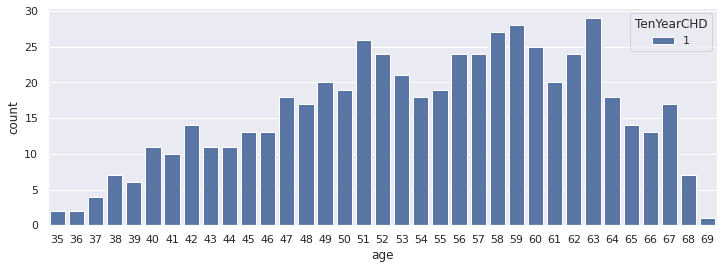

In [ ]:
#Relation of CHD with each variable

#Number of people with CHD vs age
positive_cases = fr[fr['TenYearCHD'] == 1]
plt.figure(figsize=(12,4))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD')
plt.show()
#Observation : more people are suffering with disease in age range of 51-63

In [ ]:
# Number of people with CHD vs Sex
# Number of people with CHD vs currentSmokers
# Number of people with CHD vs diabetes
# Number of people with CHD vs BPMeds
#fr.plot(x='BPMeds', kind='bar', stacked=True,
 #       title='Stacked Bar Graph by dataframe')
# Number of people with CHD vs Hypertension

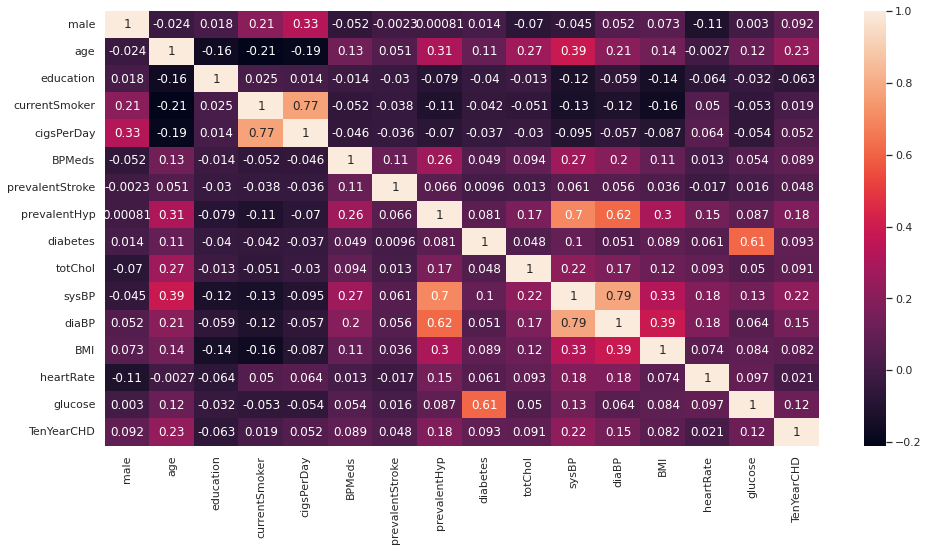

In [ ]:
# Correlation heat map
plt.figure(figsize=(16,8))
sns.heatmap(fr.corr(), annot= True)
plt.show()
#the variables with the highest correlations are age, prevalent hypertension and systolic blood pressure
#about other variables, we can't take them to predict TenYearCHD
#Variables correlated to each other : [Blood glucose and diabetes; sysBP and diaBP; currentSmoker and cigsPerDay]

In [ ]:
#With all this basic EDA we have found relations and distribution of variables.

In [ ]:
#Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
df=fr
X = df.iloc[:,0:14]  
y = df.iloc[:,-1]    

# applying SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(11,'Score'))  #printing 10 best features

In [15]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
10,sysBP,669.506552
1,age,295.507761
9,totChol,249.153078
4,cigsPerDay,156.567318
11,diaBP,142.878574
7,prevalentHyp,82.967184
8,diabetes,31.027987
5,BPMeds,28.153003
0,male,17.120430
12,BMI,15.730717


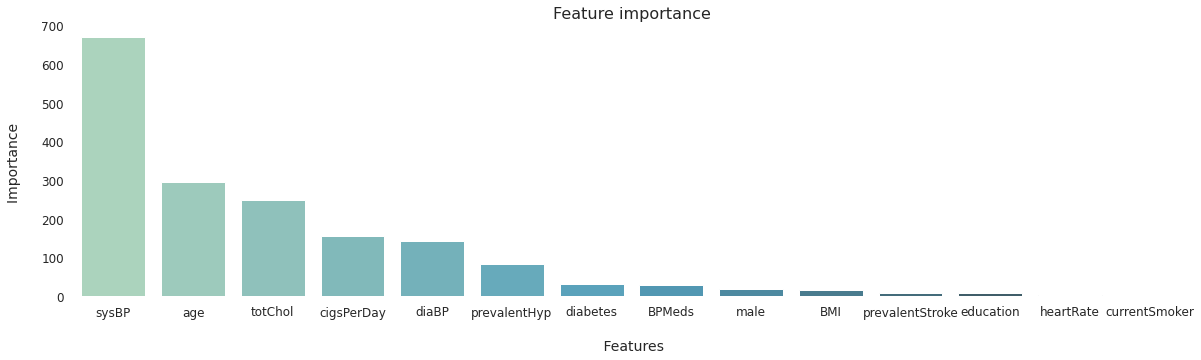

In [16]:
# visualizing the feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [17]:
#Selecting top 10 for our Target Variable
features_list = featureScores["Specs"].tolist()[:10]
features_list


['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']

In [18]:
#New Dataframe with selected features
df = df[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


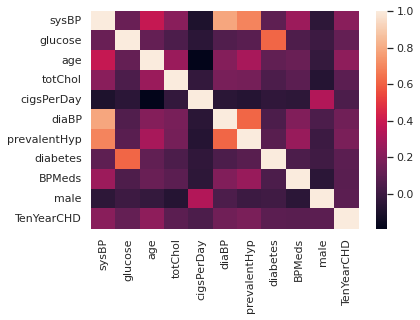

In [19]:
df_corr = df.corr()
sns.heatmap(df_corr)

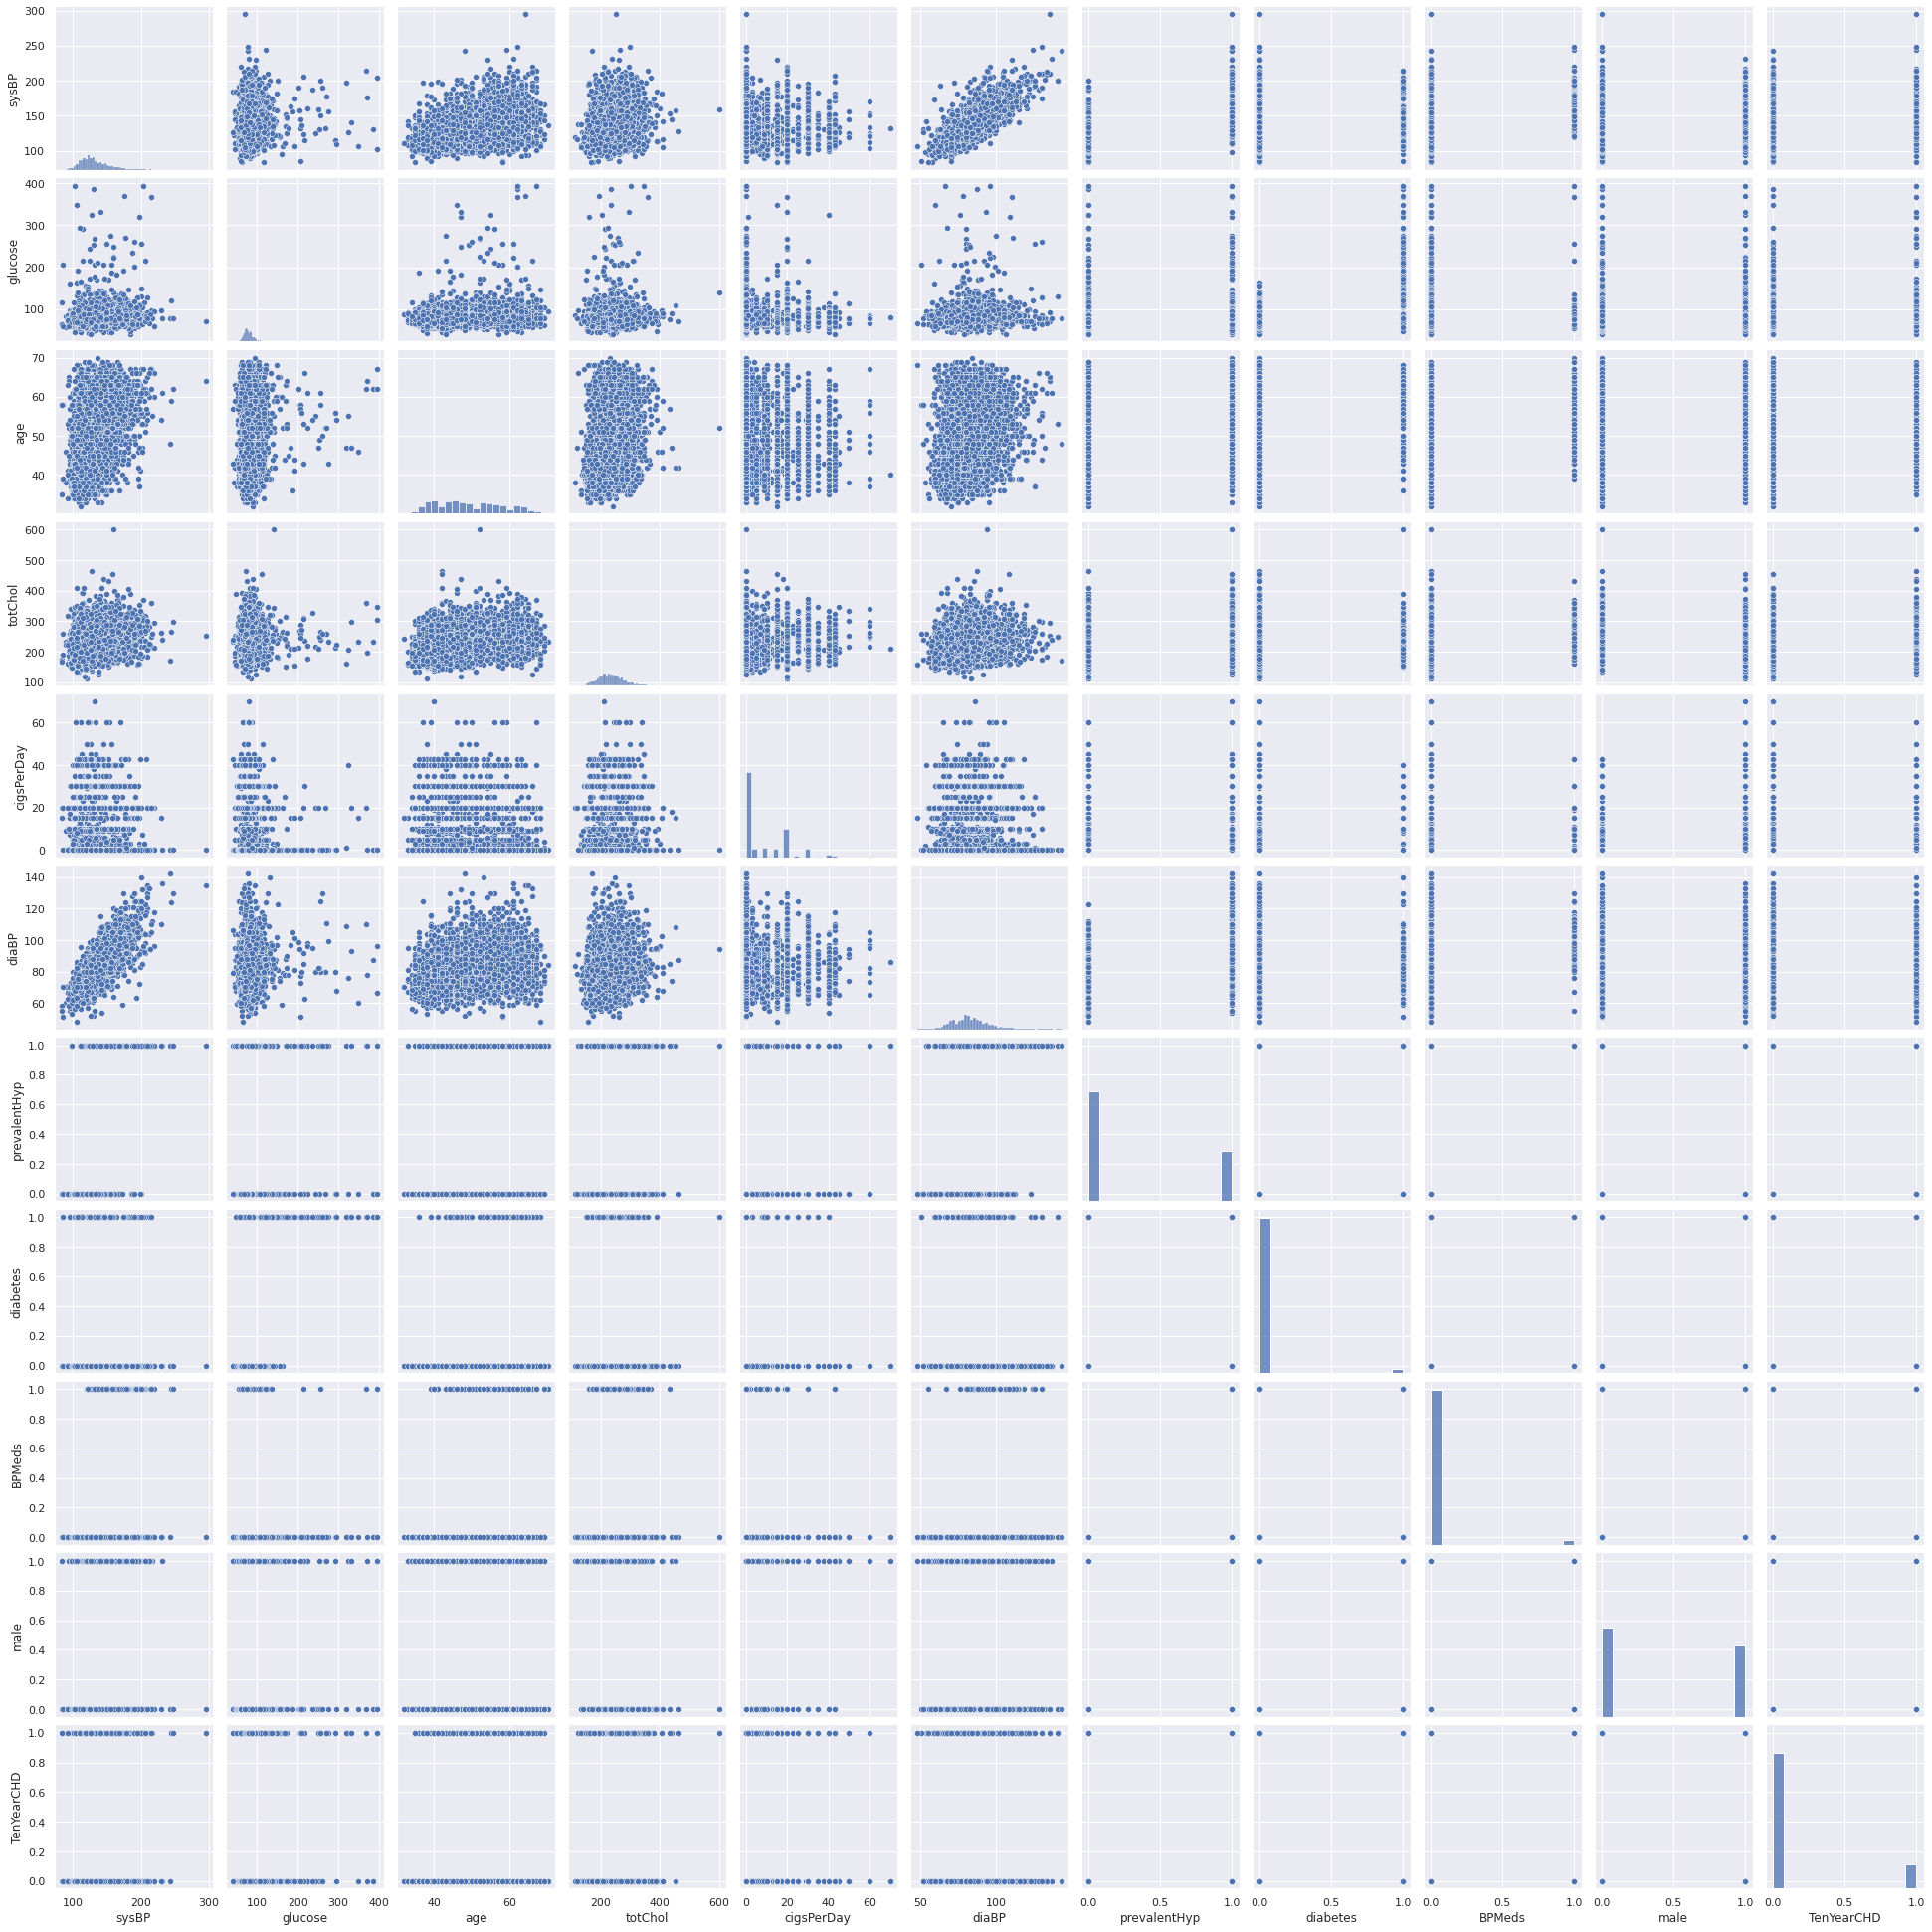

In [20]:
df.describe()
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
1111,159.5,140.0,52,600.0,0.0,94.0,1,1,0.0,0,1


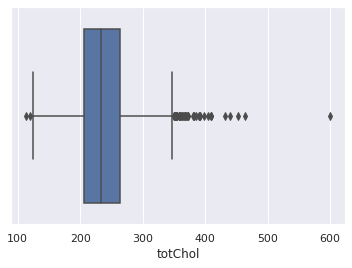

In [21]:
# Zooming into cholesterin outliers
sns.boxplot(df.totChol)
outliers = df[(df['totChol'] > 500)] 
outliers

In [22]:
df_clean = df

In [25]:
#Feature Scaling
scaler = MinMaxScaler(feature_range=(0,1)) 

#assigning scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

In [27]:
df_scaled.describe()
df.describe()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,male,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,132.368025,81.856127,49.557440,236.873085,9.022155,82.912062,0.311543,0.027079,0.030361,0.443654,0.152352
std,22.092444,23.910128,8.561133,44.096223,11.918869,11.974825,0.463187,0.162335,0.171602,0.496883,0.359411
min,83.500000,40.000000,32.000000,113.000000,0.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,117.000000,71.000000,42.000000,206.000000,0.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,78.000000,49.000000,234.000000,0.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,87.000000,56.000000,263.250000,20.000000,90.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,295.000000,394.000000,70.000000,600.000000,70.000000,142.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
#Train and Test

y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# dividing train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [32]:
len(X_train)

2924

In [33]:
len(X_test)

732

Class 0: 3099
Class 1: 557
Proportion: 5.56 : 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


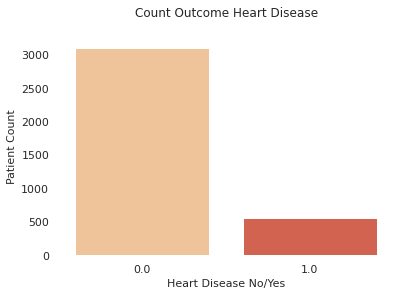

In [35]:
# Resampling imbalanced Data

target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

In [ ]:
#We can see that the proportion is 5.57:1 which is not well balanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


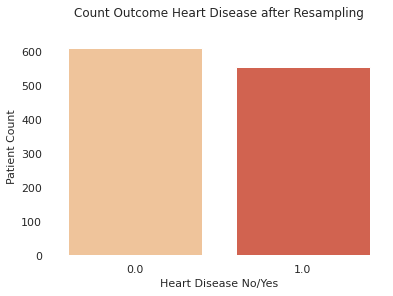

In [36]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

In [39]:
#Model Pipeline

y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

The accuracy score of LogisticRegression() is: 71.31%
The accuracy score of SVC() is: 70.22%
The accuracy score of DecisionTreeClassifier() is: 72.81%
The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 80.74%


1. Logistic Regression

In [41]:
normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)


acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")


f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")


precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")


recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 71.3%
The f1 score for LogReg is: 46.400000000000006%
The precision score for LogReg is: 34.5%
The recall score for LogReg is: 71.1%


Text(0.5, 1.1, 'Confusion matrix Logistic Regression\n')

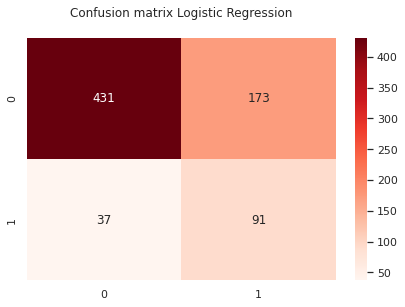

In [42]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.1)

2. SVM

In [43]:
svm = SVC()
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")


f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 70.19999999999999%
The f1 score for SVM is: 44.7%
The precision score for SVM is: 33.1%
The recall score for SVM is: 68.8%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

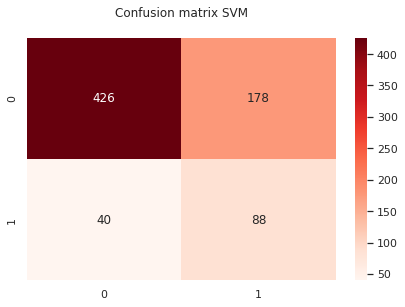

In [44]:
# plotting confusion matrix SVM
cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

3. Decision Tree

In [45]:
dtc_up = DecisionTreeClassifier()
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 74.3%
The f1 score for DTC is: 57.699999999999996%
The precision score for DTC is: 40.5%
The recall score for DTC is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

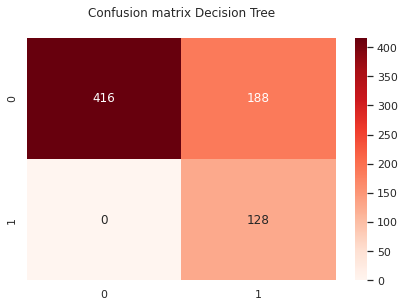

In [46]:
## plotting confusion matrix Decision Tree
cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)

4. KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
normalized_df_knn_pred = knn.predict(X_test)

acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")


The accuracy score for KNN is: 80.7%
The f1 score for KNN is: 49.5%
The precision score for KNN is: 45.7%
The recall score for KNN is: 53.900000000000006%


# Conclusion : KNN model has the highest accuracy score

In [48]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  80.73770491803278 %
The accuracy score of the training data is:  77.74 %


In [49]:
#Performing Cross Validation 
cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.84289617 0.83584131 0.84404925 0.83994528 0.82216142]
The Accuracy of Model with Cross Validation is: 83.70%


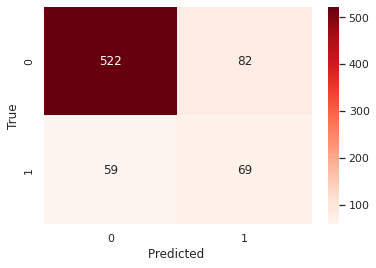

In [50]:
# plotting confusion matrix KNN
cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 

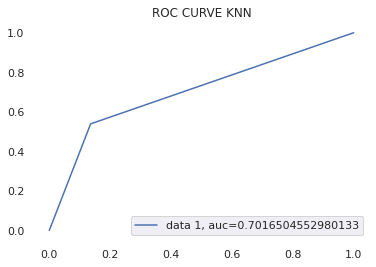

The score for the AUC ROC Curve is: 70.19999999999999%


In [51]:
# AU ROC CURVE KNN
fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")

In [52]:
#Applying this model
def start_questionnaire():
    my_predictors = []
    parameters=['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male']
    
    print('Input Patient Information:')
    
    age = input("Patient's age: >>> ") 
    my_predictors.append(age)
    male = input("Patient's gender. male=1, female=0: >>> ") 
    my_predictors.append(male)
    cigsPerDay = input("Patient's smoked cigarettes per day: >>> ") 
    my_predictors.append(cigsPerDay)
    sysBP = input("Patient's systolic blood pressure: >>> ") 
    my_predictors.append(sysBP)
    diaBP = input("Patient's diastolic blood pressure: >>> ")
    my_predictors.append(diaBP)
    totChol = input("Patient's cholesterin level: >>> ") 
    my_predictors.append(totChol)
    prevalentHyp = input("Was Patient hypertensive? Yes=1, No=0 >>> ") 
    my_predictors.append(prevalentHyp)
    diabetes = input("Did Patient have diabetes? Yes=1, No=0 >>> ") 
    my_predictors.append(diabetes)
    glucose = input("What is the Patient's glucose level? >>> ") 
    my_predictors.append(diabetes)
    BPMeds = input("Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> ")
    my_predictors.append(BPMeds)
    
    my_data = dict(zip(parameters, my_predictors))
    my_df = pd.DataFrame(my_data, index=[0])
    scaler = MinMaxScaler(feature_range=(0,1)) 
   
    # assign scaler to column:
    my_df_scaled = pd.DataFrame(scaler.fit_transform(my_df), columns=my_df.columns)
    my_y_pred = knn.predict(my_df)
    print('\n')
    print('Result:')
    if my_y_pred == 1:
        print("The patient will develop a Heart Disease.")
    if my_y_pred == 0:
      print("The patient will not develop a Heart Disease.")
        
start_questionnaire()

Input Patient Information:
Patient's age: >>> 60
Patient's gender. male=1, female=0: >>> 1
Patient's smoked cigarettes per day: >>> 0
Patient's systolic blood pressure: >>> 23
Patient's diastolic blood pressure: >>> 70
Patient's cholesterin level: >>> 45
Was Patient hypertensive? Yes=1, No=0 >>> 1
Did Patient have diabetes? Yes=1, No=0 >>> 1
What is the Patient's glucose level? >>> 
Has Patient been on Blood Pressure Medication? Yes=1, No=0 >>> 1


Result:
The patient will develop a Heart Disease.
